# Heart failure prediction project. 

## What is this project about? 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.



## Packages. 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 


# Data loading and exploration. 

## Variables explanation:

* Age : age of the person
* Anaemia : decrease of red blood cells or hemoglobin  **0** No ,**1** Yes (boolean). 
* Creatinine phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
* Diabetes: If the patient has diabetes **0** No ,**1** Yes(boolean)
* Ejection fraction: Percentage of blood leaving the heart at each contraction (percentage)
* High blood pressure: If the patient has hypertension   **0**  No ,**1** Yes (boolean)
* Platelets: Platelets in the blood (kiloplatelets/mL)
* Serum creatinine: Level of serum creatinine in the blood (mg/dL)
* Serum sodium: Level of serum sodium in the blood (mEq/L)
* Sex: Woman **0** or man **1** (binary)
* Smoking: If the patient smokes or not  **0**  No ,**1** (boolean)
* Time: Follow-up period (days) 
* Death event ( _**target variable**_): If the patient deceased during the follow-up period   **0** No ,**1** Yes (boolean)

In [2]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There are not missing values. 

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# EDA 

## Visualizing survival based on different binary features. 

### Survival based on sex

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

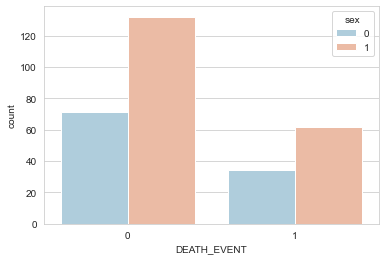

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='DEATH_EVENT',hue = 'sex',data = df,palette='RdBu_r')

### Survival based on diabetes. 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

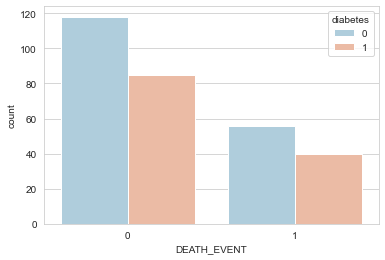

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='DEATH_EVENT',hue = 'diabetes',data = df,palette='RdBu_r')

### Survival based on anemia. 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

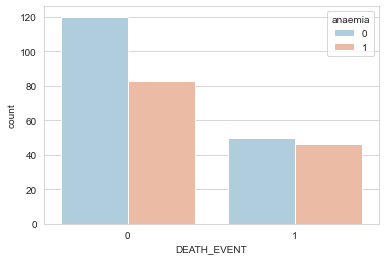

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='DEATH_EVENT',hue = 'anaemia',data = df,palette='RdBu_r')

### Survival based on smoking. 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

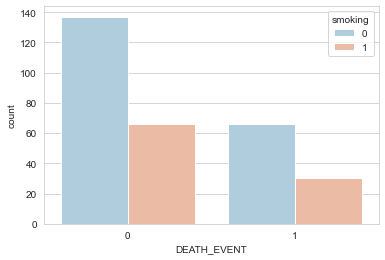

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='DEATH_EVENT',hue = 'smoking',data = df,palette='RdBu_r')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

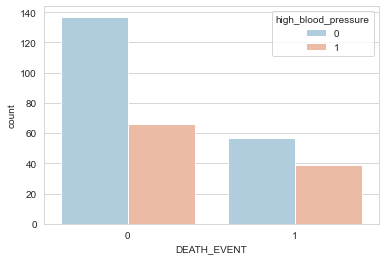

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='DEATH_EVENT',hue = 'high_blood_pressure',data = df,palette='RdBu_r')

#### It seems that age and smoking are highly related with the heart desease. 

## Demographic information. 

### Age distribution of the patients.

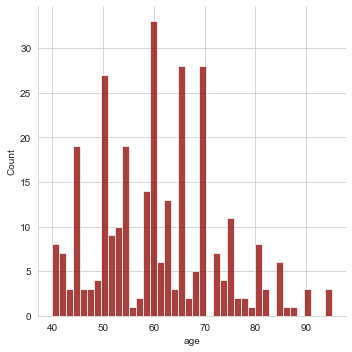

In [12]:
sns.displot(df['age'],kde = False, color = 'darkred', bins = 40 )

In [13]:
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols

init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [21]:
fig = px.histogram(df, x="age", color="sex", marginal="box",
                   hover_data=df.columns)
fig.show()

In [ ]:
hist_data = [df["age"].values]

group_labels = ['age']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

In [22]:
hist_data =[df["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels,curve_type='normal')
fig.update_layout(title_text='Age Distribution plot')

fig.show()

In [18]:
fig = px.box(df, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [35]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
         len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()